In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
def display(image,cmap = "gray"):
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111)
    ax.set_title(f"Shape : {image.shape}",fontsize = 15)
    ax.imshow(image, cmap = cmap)
    plt.show()

In [61]:
sammy = cv2.imread("DATA/sammy.jpg")
sammy = cv2.cvtColor(sammy, cv2.COLOR_BGR2RGB)

face = cv2.imread("DATA/sammy_face.jpg")
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

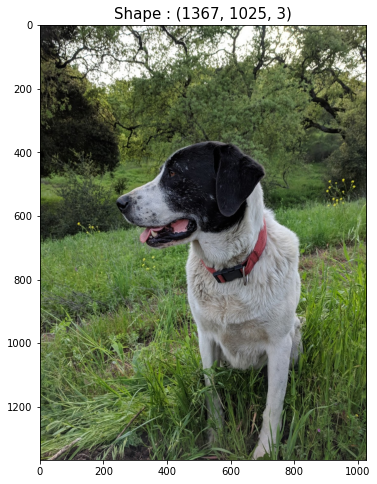

In [62]:
display(sammy)

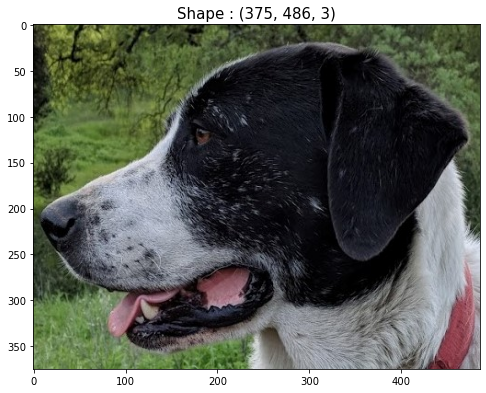

In [63]:
display(face)

In [64]:
sum([1,2,3,4])

10

In [65]:
mystring = "sum"
myfunc = eval(mystring)
myfunc([1,2,3,4])

10

In [66]:
height , width , channels = face.shape

In [67]:
height,width,channels

(375, 486, 3)

In [68]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

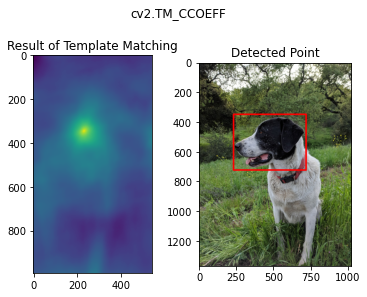

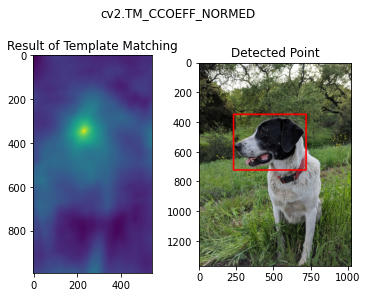

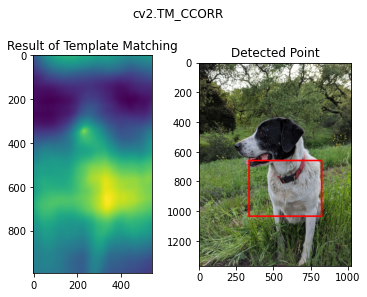

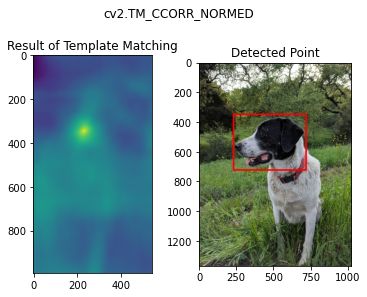

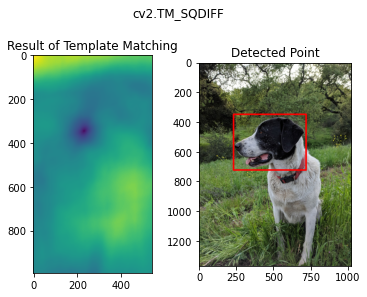

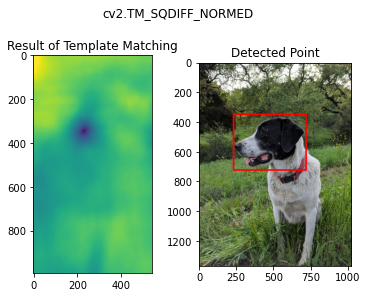

In [69]:
for m in methods:
    
    sammy_copy = sammy.copy()
    
    method = eval(m)
    
    result = cv2.matchTemplate(sammy_copy,face,method)
    
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        
        top_left = minLoc
    
    else:
        
        top_left = maxLoc
        
    
    height , width , channels = face.shape
    
    bottom_right = (top_left[0] + width , top_left[1] + height)
    
    cv2.rectangle(sammy_copy, top_left, bottom_right,255,10)
    
    plt.subplot(121)
    plt.imshow(result)
    plt.title("Result of Template Matching")
    
    plt.subplot(122)
    plt.imshow(sammy_copy)
    plt.title("Detected Point")
    
    plt.suptitle(m,y = 1.05)
    
    plt.show()
    
    print()
    print()

---

## Corner Detection

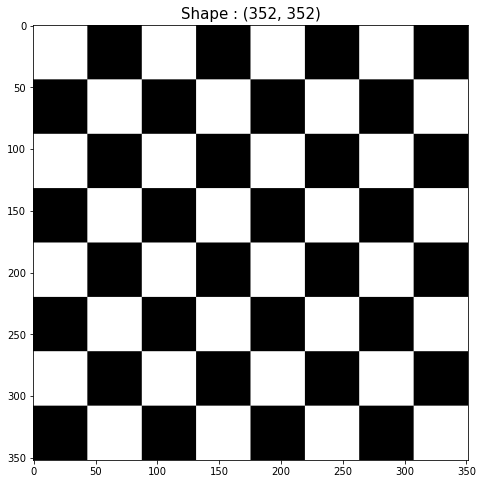

In [87]:
flat_chess = cv2.imread("DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)

real_chess = cv2.imread("DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)

display(gray_flat_chess)

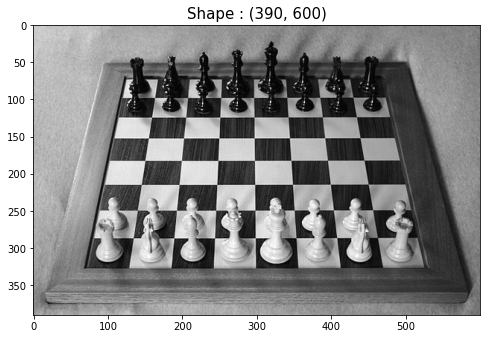

In [88]:
display(gray_real_chess)

## Harris Corner Detection

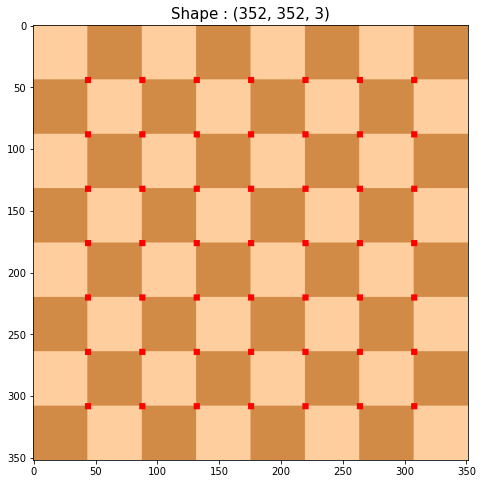

In [89]:
gray = np.float32(gray_flat_chess)

dst = cv2.cornerHarris(src = gray,blockSize = 2, ksize = 3, k = 0.04)

dst = cv2.dilate(dst,None)

flat_chess[dst > 0.01*dst.max()] = [255,0,0]

display(flat_chess)

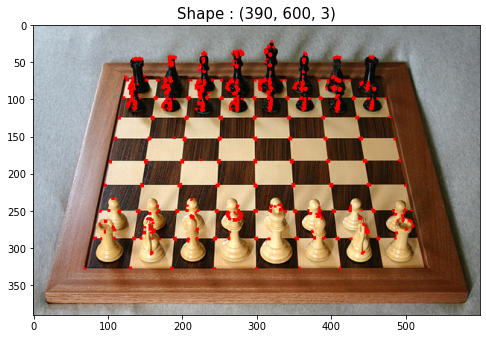

In [94]:
gray = np.float32(gray_real_chess)

dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)

dst = cv2.dilate(dst,None)

real_chess[dst>0.01*dst.max()] = [255,0,0]

display(real_chess)

In [95]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)

In [109]:
corners = cv2.goodFeaturesToTrack(image = gray_flat_chess,
                                  maxCorners = 4,
                                  qualityLevel = 0.01,
                                  minDistance = 10)
corners

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]]], dtype=float32)

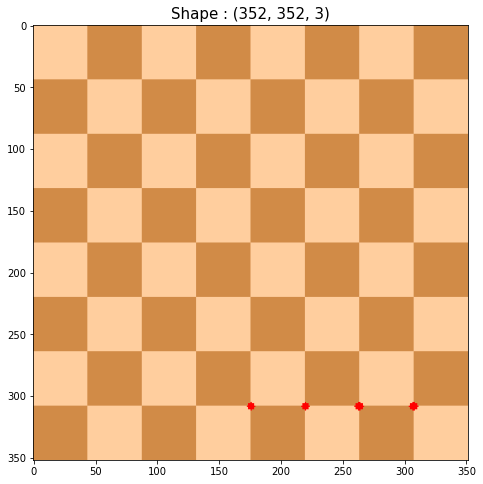

In [110]:
for i in corners :
    
    x,y= i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)
    
display(flat_chess)

In [115]:
real_chess = cv2.imread("DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)

In [118]:
corners = cv2.goodFeaturesToTrack(image = gray_real_chess,
                                  maxCorners = 80,
                                  qualityLevel = 0.01,
                                  minDistance = 10)

corners

array([[[178.,  91.]],

       [[132.,  90.]],

       [[448.,  86.]],

       [[177.,  75.]],

       [[183., 105.]],

       [[207., 288.]],

       [[403.,  87.]],

       [[248., 183.]],

       [[154., 154.]],

       [[274., 109.]],

       [[223.,  92.]],

       [[278., 258.]],

       [[299., 249.]],

       [[261.,  80.]],

       [[197., 216.]],

       [[299., 286.]],

       [[249., 152.]],

       [[270.,  99.]],

       [[299., 214.]],

       [[145., 215.]],

       [[243., 286.]],

       [[317.,  77.]],

       [[365.,  85.]],

       [[190., 286.]],

       [[248., 214.]],

       [[149., 184.]],

       [[227., 110.]],

       [[260., 254.]],

       [[133.,  74.]],

       [[194., 249.]],

       [[246., 249.]],

       [[164.,  98.]],

       [[200., 184.]],

       [[362., 112.]],

       [[344., 152.]],

       [[132., 100.]],

       [[407., 113.]],

       [[298., 182.]],

       [[317., 112.]],

       [[348., 215.]],

       [[205., 249.]],

       [[274.,  

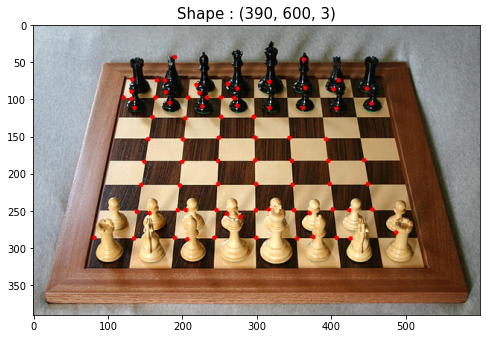

In [119]:
for i in corners :
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,255,-1)
    
display(real_chess)

---

# Canny Edge Detection
https://en.wikipedia.org/wiki/Canny_edge_detector

In [120]:
sammy = cv2.imread("DATA/sammy.jpg")
sammy = cv2.cvtColor(sammy, cv2.COLOR_BGR2RGB)

face = cv2.imread("DATA/sammy_face.jpg")
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

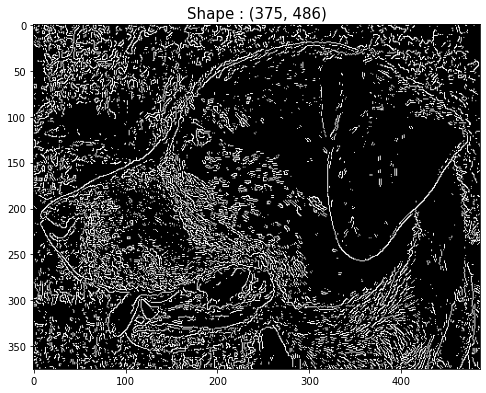

In [122]:
edges = cv2.Canny(image = face , threshold1 = 127, threshold2 = 127)
display(edges)

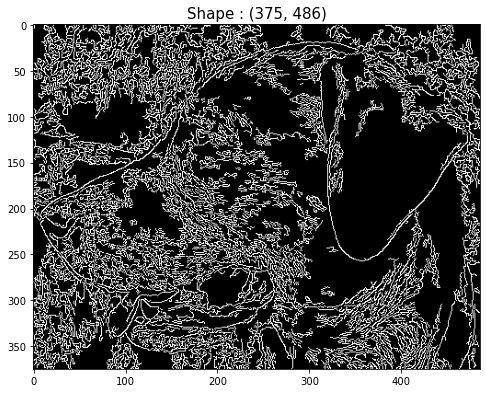

In [123]:
edges = cv2.Canny(image = face , threshold1 = 0, threshold2 = 255)
display(edges)

## Choosing Thresholds

In [125]:
med_val = np.median(face)
med_val

64.0

In [126]:
lower = int(max(0,0.7*med_val))
upper = int(min(255,1.3*med_val))

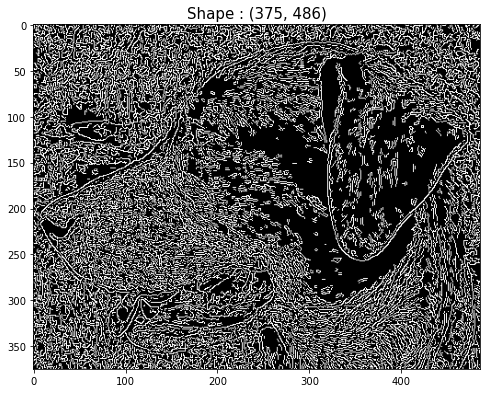

In [128]:
edges = cv2.Canny(image = face , threshold1 = lower, threshold2 = upper)
display(edges)

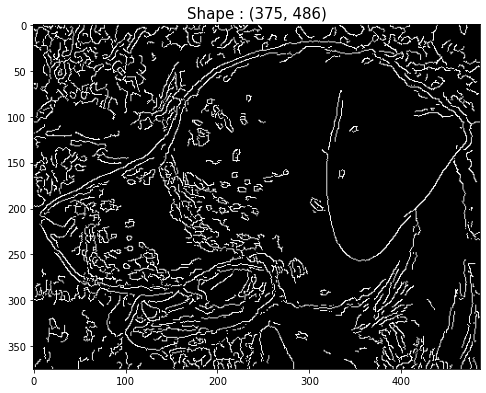

In [129]:
blurred_face = cv2.blur(face, ksize=(5,5))
edges = cv2.Canny(blurred_face,threshold1 = lower, threshold2 = upper)
display(edges)

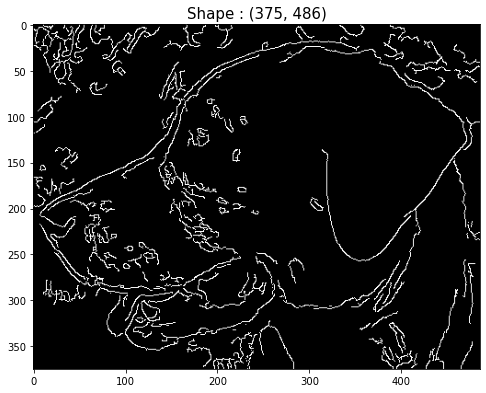

In [130]:
blurred_face = cv2.blur(face, ksize=(5,5))
edges = cv2.Canny(blurred_face,threshold1 = lower, threshold2 = upper+50)
display(edges)

---

## Grid Detection

In [131]:
flat_chess = cv2.imread("DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)

real_chess = cv2.imread("DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)

In [132]:
found , corners = cv2.findChessboardCorners(flat_chess,(7,7))
found

True

In [134]:
if found:
    print('OpenCV was able to find the corners')
else:
    print("OpenCV did not find corners. Double check your patternSize.")

OpenCV was able to find the corners


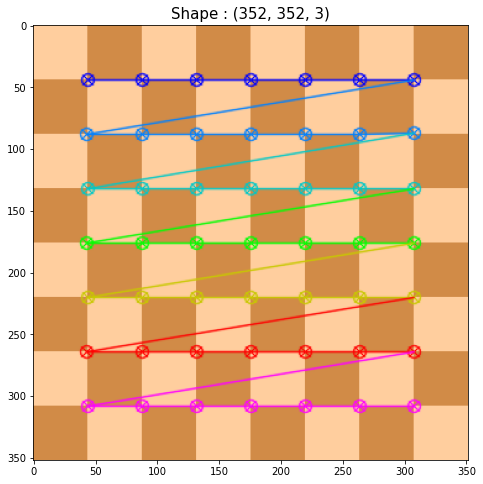

In [139]:
flat_chess_copy = flat_chess.copy()
cv2.drawChessboardCorners(flat_chess_copy,(7,7),corners , found)
display(flat_chess_copy)

## Circle Based Grids

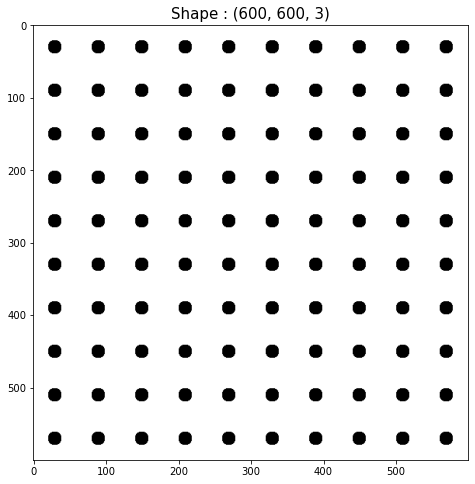

In [143]:
dots = cv2.imread("DATA/dot_grid.png")
display(dots)

In [145]:
found, corners = cv2.findCirclesGrid(dots , (10,10)  )
found

True

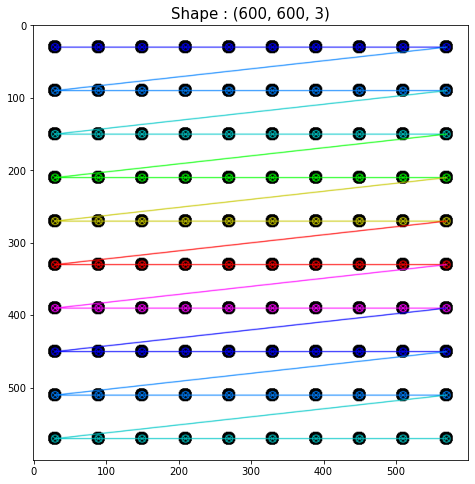

In [148]:
dots_copy = dots.copy()
cv2.drawChessboardCorners(dots_copy,(10,10),corners,found)
display(dots_copy)

---

## CONTOUR DETECTION

### EXTERNAL VS INTERNAL CONTOURS

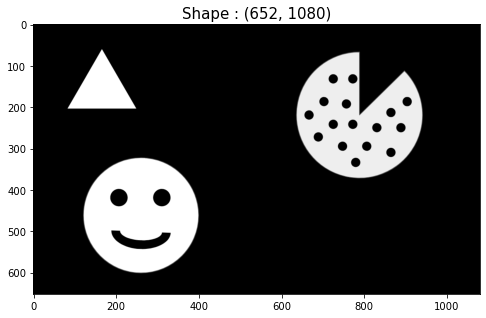

In [162]:
img = cv2.imread("DATA/internal_external.png",0)
display(img)

**findContours**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [164]:
contours , hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
type(contours), type(hierarchy)

(list, numpy.ndarray)

In [165]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

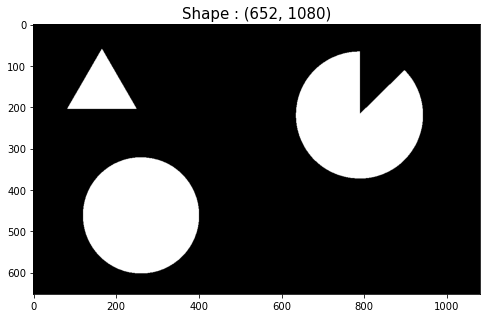

In [166]:
external_contours = np.zeros(img.shape)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        
        cv2.drawContours(external_contours,contours,i,255,-1)
        
display(external_contours,cmap = "gray")

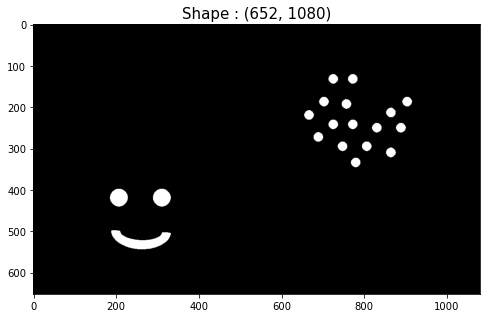

In [169]:
internal_contours = np.zeros(img.shape)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] != -1:
        
        cv2.drawContours(internal_contours,contours,i,255,-1)
        
display(internal_contours,cmap = "gray")

---

## Feature Matching

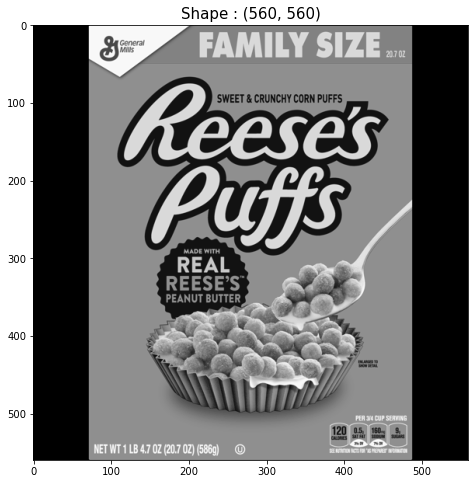

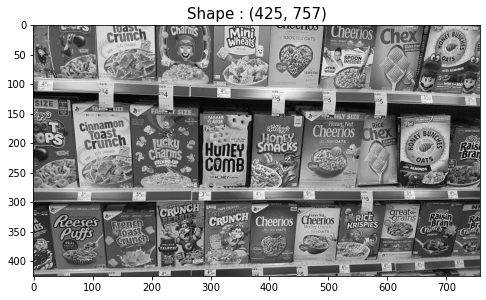

In [171]:
reeses = cv2.imread("DATA/reeses_puffs.png", 0 )
cereas = cv2.imread("DATA/many_cereals.jpg", 0 )


display(reeses)
display(cereas)

## Brute Force Detection With ORB Descriptors

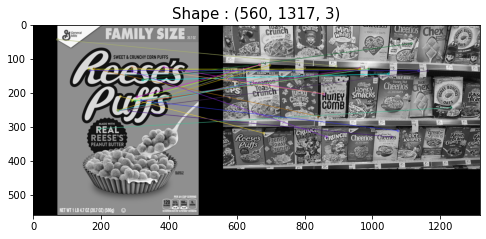

In [174]:
orb = cv2.ORB_create()

kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereas,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING2,crossCheck = True)

matches = bf.match(des1,des2)

matches = sorted(matches , key = lambda x : x.distance)


reeses_matches = cv2.drawMatches(reeses,kp1,cereas,kp2,matches[:25],None,flags = 2)

display(reeses_matches)

# Brute-Force Matching with SIFT Descriptors and Ratio Test

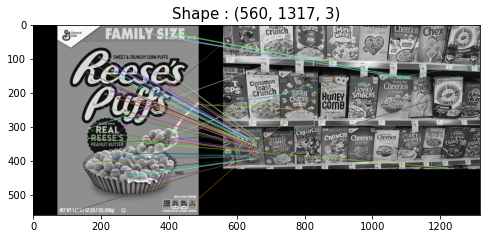

In [180]:
sift = cv2.SIFT_create()

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereas,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k = 2)

good = []

for matches1,matches2 in matches :
    
    if matches1.distance < 0.75 * matches2.distance :
        
        good.append([matches1])
        
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereas,kp2,good,None,flags = 2)

display(sift_matches)

## FLANN based Matcher

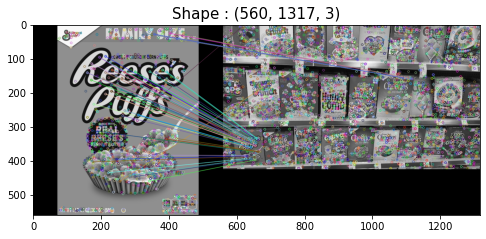

In [183]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereas,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereas,kp2,good,None,flags=0)

display(flann_matches)

---

## Image Segmentation and The Watershed Algorithm

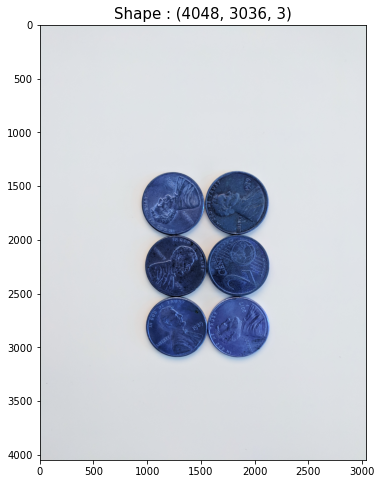

In [184]:
img = cv2.imread("DATA/pennies.jpg")
display(img)

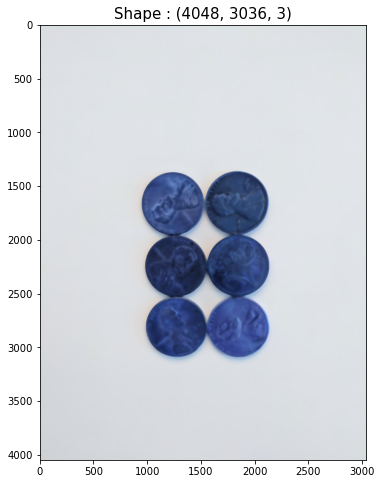

In [185]:
blur_img = cv2.medianBlur(img,25)
display(blur_img)

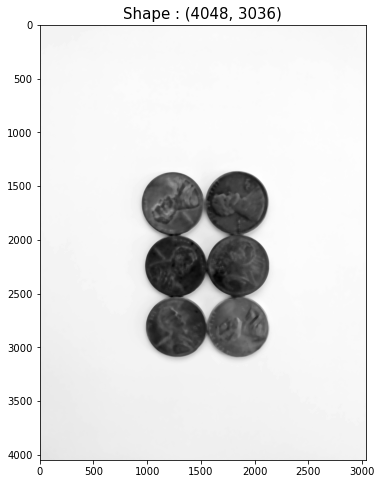

In [186]:
gray_img = cv2.cvtColor(blur_img,cv2.COLOR_BGR2GRAY)
display(gray_img)

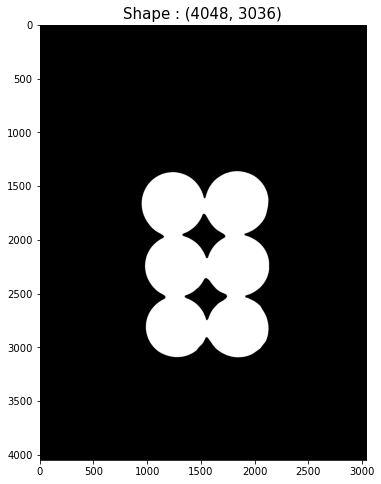

In [187]:
ret, thresh = cv2.threshold(gray_img,160,255,cv2.THRESH_BINARY_INV)
display(thresh)

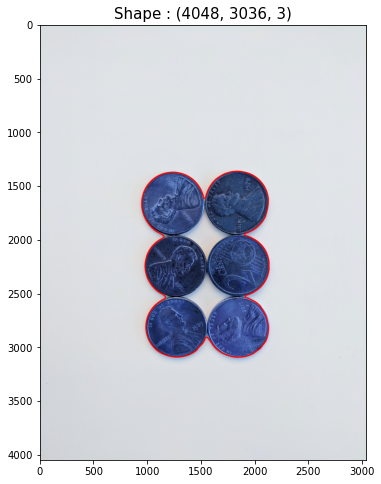

In [188]:
contours,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        
        cv2.drawContours(img,contours,i,255,10)
        
display(img)

# Watershed Algorithm

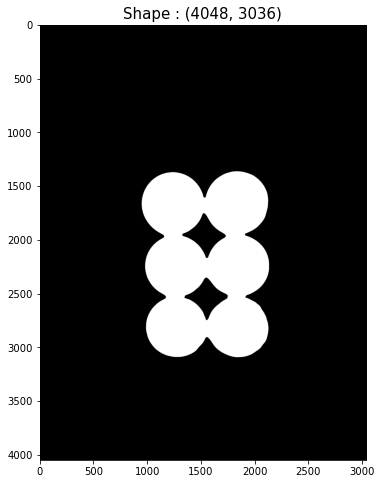

In [189]:
img = cv2.imread("DATA/pennies.jpg")

blur_img = cv2.medianBlur(img,35)

gray_img = cv2.cvtColor(blur_img,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

display(thresh)

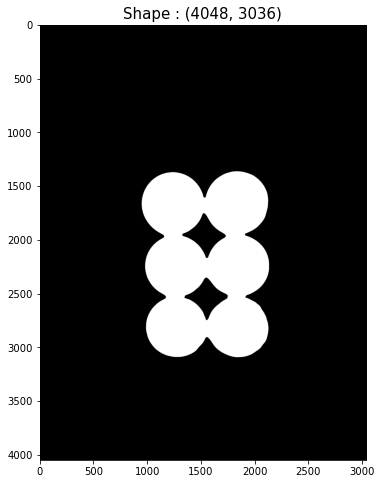

In [190]:
# Noise Removel

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel,iterations = 2)
display(opening)

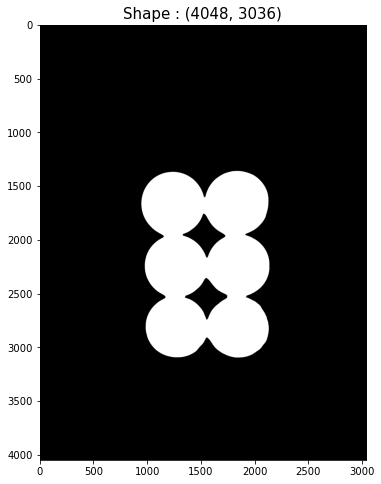

In [191]:
sure_bg = cv2.dilate(opening,kernel,iterations = 3)
display(sure_bg)

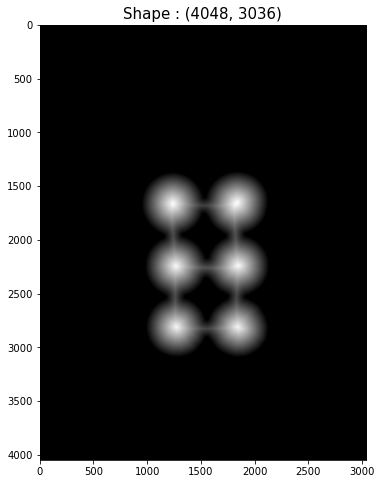

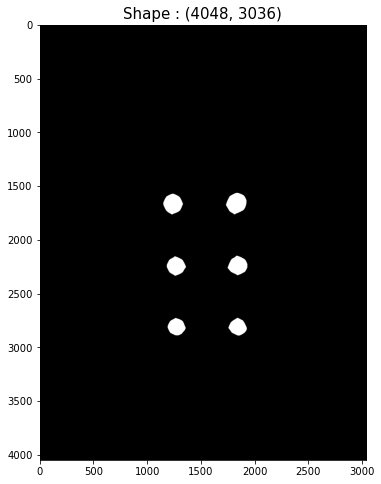

(None, None)

In [194]:
dist_img = cv2.distanceTransform(opening,cv2.DIST_L2,5)

ret, sure_fg = cv2.threshold(dist_img,0.7*dist_img.max(),255,0)

display(dist_img),display(sure_fg)

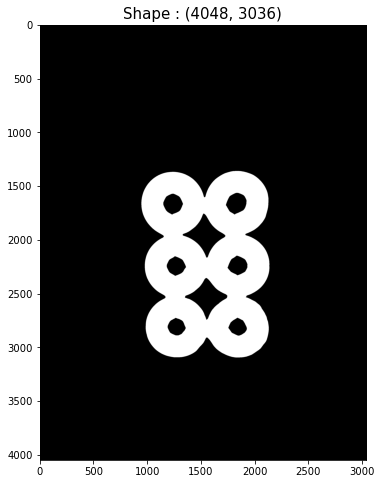

In [197]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
display(unknown)

In [199]:
ret,markers = cv2.connectedComponents(sure_fg)
markers.shape

(4048, 3036)

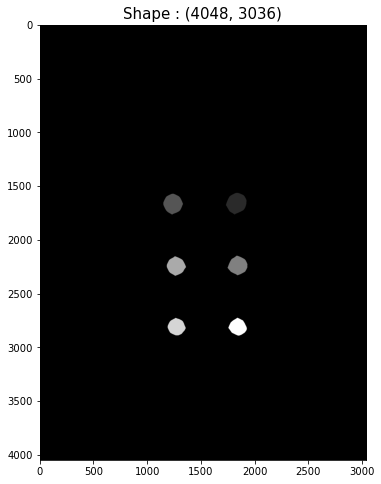

In [201]:
display(markers)

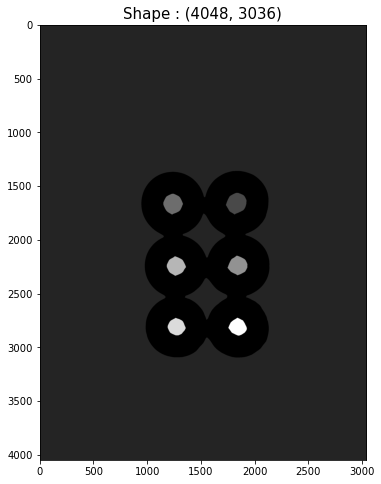

In [202]:
markers  = markers + 1

markers[unknown == 255] = 0

display(markers)

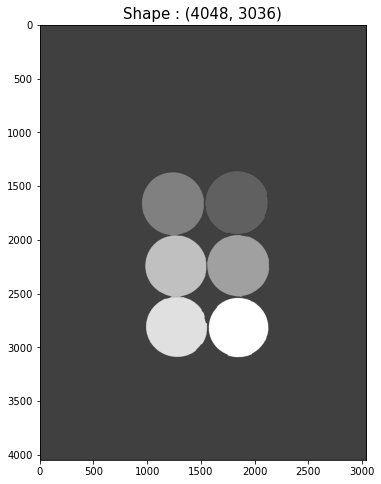

In [203]:
markers = cv2.watershed(img,markers)
display(markers)

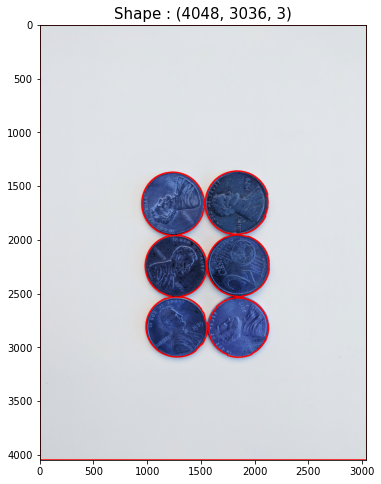

In [204]:
contours , hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        
        cv2.drawContours(img, contours,i,255,10)
        
display(img)

---

# Custom Seeds with the WaterShed Algorithm

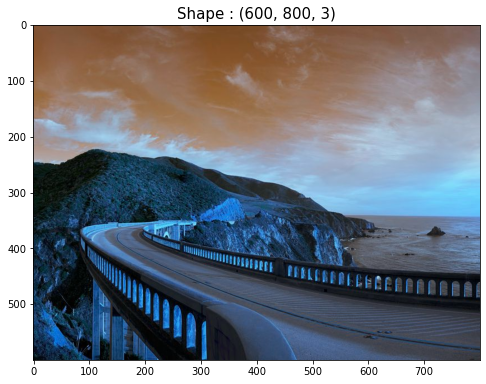

In [206]:
road = cv2.imread("DATA/road_image.jpg")

road_copy = road.copy()



In [208]:
marker_image = np.zeros(road.shape[:2],dtype = np.float32)

segments = np.zeros(road.shape, dtype = np.uint8)

segments.shape,marker_image.shape

((600, 800, 3), (600, 800))

In [209]:
from matplotlib import cm

In [211]:
def create_rgb(i):
    
    x = np.array(cm.tab10(i))[:3]*255
    
    return tuple(x)

In [212]:
colors = []

for i in range(10):
    
    colors.append(create_rgb(i))

In [216]:
def mouse_callback(event, x, y, flags, param):
    global marks_updated 

    if event == cv2.EVENT_LBUTTONDOWN:
        
        # TRACKING FOR MARKERS
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
        
        # DISPLAY ON USER IMAGE
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True

In [218]:
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    # SHow the 2 windows
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('Road Image', road_copy)
        
        
    # Close everything if Esc is pressed
    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Clear all colors and start over if 'c' is pressed
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[0:2], dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
        
    # If a number 0-9 is chosen index the color
    elif k > 0 and chr(k).isdigit():
        # chr converts to printable digit
        
        current_marker  = int(chr(k))
        
        # CODE TO CHECK INCASE USER IS CARELESS
#         n = int(chr(k))
#         if 1 <= n <= n_markers:
#             current_marker = n
    
    # If we clicked somewhere, call the watershed algorithm on our chosen markers
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
        
cv2.destroyAllWindows()

error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-oe0iat4a/opencv/modules/imgproc/src/segmentation.cpp:161: error: (-215:Assertion failed) src.type() == CV_8UC3 && dst.type() == CV_32SC1 in function 'watershed'


## Face Detection

In [221]:
nadia = cv2.imread("DATA/Nadia_Murad.jpg",0)
denis = cv2.imread("DATA/Denis_Mukwege.jpg",0)
solvay = cv2.imread("DATA/solvay_conference.jpg",0)

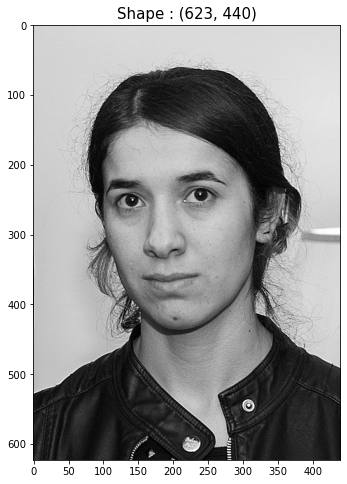

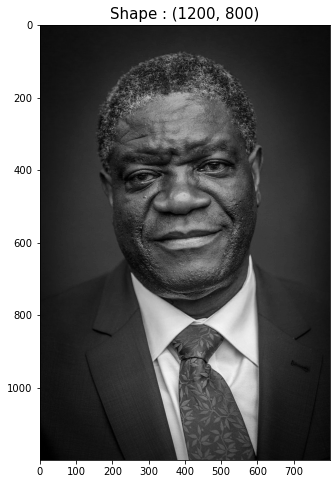

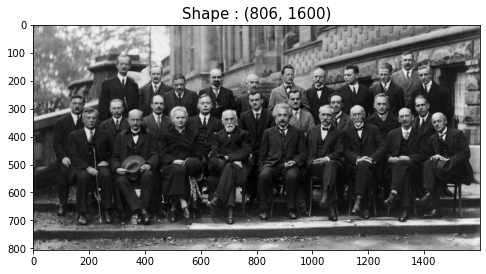

(None, None, None)

In [222]:
display(nadia),display(denis),display(solvay)

In [223]:
face_cascade = cv2.CascadeClassifier("DATA/haarcascades/haarcascade_frontalface_default.xml")

In [224]:
def detect_face(image):
    
    face_img = image.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

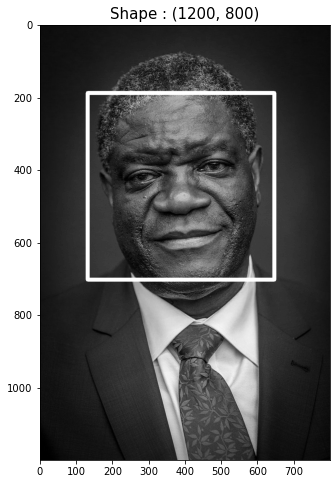

In [226]:
display(detect_face(denis))

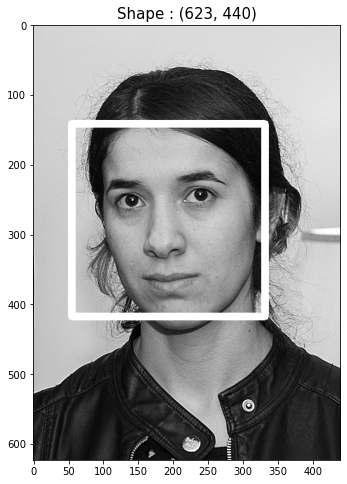

In [227]:
display(detect_face(nadia))

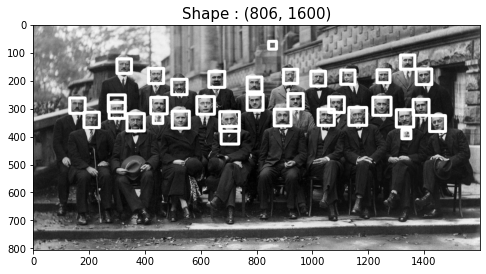

In [228]:
display(detect_face(solvay))

In [237]:
face_cascade = cv2.CascadeClassifier("DATA/haarcascades/haarcascade_frontalface_default.xml")

def adj_detect_face(image):
    
    face_img = image.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor = 1.2, minNeighbors = 5 )
    
    for (x,y,w,h) in face_rects :
        
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

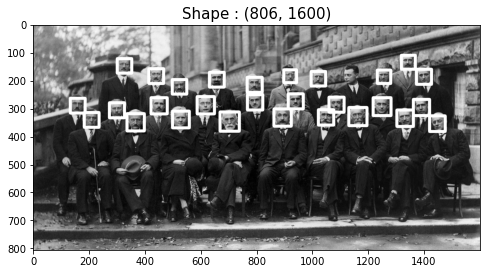

In [238]:
display(adj_detect_face(solvay))

In [239]:
eye_cascade = cv2.CascadeClassifier("DATA/haarcascades/haarcascade_eye.xml")

def detect_eyes(image):
    
    eyes_img = image.copy()
    
    eyes_rects = eye_cascade.detectMultiScale(eyes_img,scaleFactor = 1.2, minNeighbors = 5 )
    
    for (x,y,w,h) in eyes_rects :
        
        cv2.rectangle(eyes_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return eyes_img

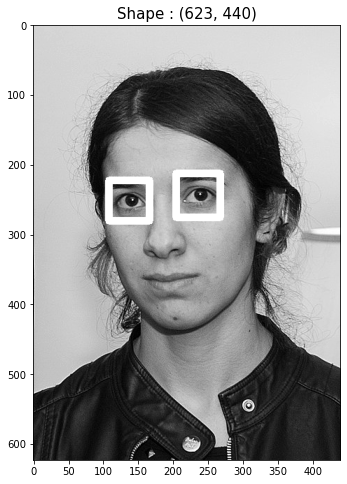

In [240]:
display(detect_eyes(nadia))

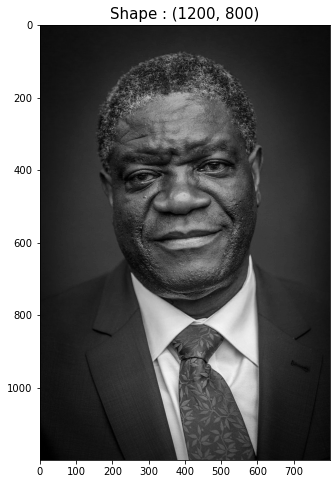

In [241]:
display(detect_eyes(denis))

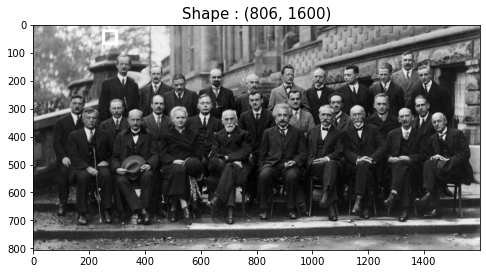

In [242]:
display(detect_eyes(solvay))

In [ ]:
## import cv2

cap = cv2.VideoCapture(0)

face_cascade = cv2.CascadeClassifier("DATA/haarcascades/haarcascade_frontalface_default.xml")

def detect_face(image):
    
    image_copy = image.copy()
    
    image_rects = face_cascade.detectMultiScale(image_copy)
    
    for x,y,w,h in image_rects:
        
        cv2.rectangle(image_copy,(x,y),(x+w,y+h),(255,255,255),10)
        
    return image_copy


while True:
    
    ret,frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow("Video Face Detect", frame)
    
    
    k = cv2.waitKey(1)
    
    print(k)
    
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

## 